# Solar Radiation Monitoring Laboratory (SRML)

The [Solar Radiation Monitoring Laboratory (SRML)](http://solardat.uoregon.edu/index.html) at the University of Oregon has been providing [solar radiation data](http://solardat.uoregon.edu/SolarData.html) for the Northeastern United States since 1975. The SRML monitoring station network consists of both high-quality stations (Tier 1) that measure all three irradiance components at a 1-minute resolution, as well as stations with low quality instruments (Tier 2) that only log measurements hourly. A full list of the 42 stations (including discontinued stations) can be found on the [SRML website](http://solardat.uoregon.edu/MonitoringStations.html).

Only the high-quality SRML stations are included in the SolarStations' [station listing](../station_listing); however, all active stations will be shown below.

In [17]:
import pandas as pd
stations = pd.read_csv('station_network_srml.csv', encoding='latin1').fillna('')
stations = stations[stations['Network'].str.contains('SRML')]
stations

,Station full name,Abbreviation,State,Country,Latitude,Longitude,Elevation,Time period,Network,Owner,Comment,URL,Data availability,Tier,Instrument,Components
0,Ashland,ASO,Oregon,USA,42.194410,-122.698158,594,,SRML,,Station id no.: 94040,,,1,,G;B;D
1,Bend,BDO,Oregon,USA,44.056140,-121.307440,1104,1977-,SRML,,Station id no.: 94807,,,,RSP,
2,Burns,BUO,Oregon,USA,43.519200,-119.021610,1270,,SRML,,Station id no.: 94170,,,1,,G;B;D
3,Christmas Valley,CHO,Oregon,USA,43.200000,-120.728050,1313,1994-,SRML,,Station id no.: 94251,,,2,LI-COR pyranometer with shadowband,
4,Cheney,CYW,Washington,USA,47.489900,-117.589126,717,,SRML,,Station id no.: 94158,,,2,RSR,
5,Eugene,EUO,Oregon,USA,44.046761,-123.074243,150,,SRML,,Station id no.: 94255,,,1,,G;B;D
6,Forest Grove,FGO,Oregon,USA,45.553050,-123.083610,180,1997-,SRML,,Station id no.: 94008,http://solardat.uoregon.edu/ForestGrove.html,,2,LI-COR pyranometer,
7,Hermiston,HEO,Oregon,USA,45.818441,-119.284721,188,,SRML,,Station id no.: 94169,,,1,,G;B;D
8,Madras,MAO,Oregon,USA,44.680000,-121.148610,744,1994-,SRML,,Station id no.: 94008,,,2,LI-COR pyranometer with shadowband,
9,Portland,PSO,Oregon,USA,45.512679,-122.683470,63,,SRML,,Station id no.: 94808,,,1,,G;B;D


```{margin} Station metadata
Click the plus symbol above to see a table of the stations and their metadata.
```

In [16]:
import folium
from folium import plugins

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

# Create Folium map
m = folium.Map(
    location=[45, -118],
    zoom_start=5, min_zoom=3, max_bounds=True,
    control_scale=True,  # Adds distance scale in lower left corner
    tiles='openstreetmap',
)

# Add each station to the map
# Consider using apply instead of for loop to add stations in case of many stations
for index, row in stations.iterrows():
    if row['Tier'] == 1:  # Tier 1 stations (high-quality)
        color = '#3186cc'
    else:
        color = '#ff422b'  # Tier 2 stations
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station full name'] + ' - ' + str(row['State']) + ' ' + row['Country'],
        tooltip=row['Abbreviation'],
        radius=9, color=color,
        fill_color=color, fill=True).add_to(m)

folium.raster_layers.TileLayer(EsriImagery, name='World imagery', attr=EsriAttribution).add_to(m)
folium.LayerControl(position='topleft').add_to(m)

# Additional options and plugins
# Note it's not possible to change the position of the scale
plugins.MiniMap(toggle_display=True, zoom_level_fixed=2, minimized=True, position='bottomright').add_to(m)  # Add minimap to the map
plugins.Fullscreen(position='topright').add_to(m)  # Add full screen button to map
folium.LatLngPopup().add_to(m)  # Show latitude/longitude when clicking on the map
# plugins.LocateControl(position='topright').add_to(m)  # Add button for your position
# plugins.MeasureControl(position='topleft').add_to(m)  # Add distance length measurement tool

# Create legend
legend_html = """
<div style="position:fixed;
     top: 10px; 
     left: 10px; 
     width: 120px; 
     height: 65px; 
     border:2px solid grey; 
     z-index: 9999;
     background-color:#f2efe9;
     font-size:14px;">
     &nbsp;<b>Station markers</b><br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:#3186cc"></i>&nbsp;Tier 1<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:#FA8072"></i>&nbsp;Tier 2<br>
</div>"""
m.get_root().html.add_child(folium.Element(legend_html))  # Add Legend to map

# Show the map
m

## Data retrieval

Data from the SRML stations is stored in monthly files for each station and can be freely [downloaded](http://solardat.uoregon.edu/SelectArchivalUpdatedFormat.html) from their website. The data can also be downloaded programmatically using the [pvlib-python](https://pvlib-python.readthedocs.io) library, specifically the [`read_srml_month_from_solardat`](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.iotools.read_srml_month_from_solardat.html) function. A list of the station acronyms can be found [here](http://solardat.uoregon.edu/StationIDCodes.html).

```{admonition} Help support the SRML
If you find the data useful, please consider donating to [support the SRML](http://solardat.uoregon.edu/Donate.html).
```

An example of how to use pvlib to download data from the [Hermiston station](http://solardat.uoregon.edu/Hermiston.html) for June 2020 is shown here:

In [3]:
import pvlib

df = pvlib.iotools.read_srml_month_from_solardat(
    station='HE',
    year=2020,
    month=6)

df.head(12)  # print the first 12 rows of data

,ghi_0,ghi_0_flag,dni_0,dni_0_flag,dhi_3,dhi_3_flag,ghi_2,ghi_2_flag,dni_2,dni_2_flag,...,relative_humidity_1,relative_humidity_1_flag,9151,9151_flag,wind_dir_1,wind_dir_1_flag,wind_speed_1,wind_speed_1_flag,dhi_0,dhi_0_flag
2020-06-01 00:00:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.3,12,0.0,11,172.5,11,1.3,12,0,71
2020-06-01 00:01:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.5,12,0.0,11,180.7,11,1.3,12,0,71
2020-06-01 00:02:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,128.9,11,0.4,12,0,71
2020-06-01 00:03:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.4,12,0.0,11,141.6,11,1.2,12,0,71
2020-06-01 00:04:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,186.3,11,0.8,12,0,71
2020-06-01 00:05:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.4,12,0.0,11,188.7,11,1.8,12,0,71
2020-06-01 00:06:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.1,12,0.0,11,170.8,11,0.9,12,0,71
2020-06-01 00:07:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.5,12,0.0,11,122.4,11,0.0,12,0,71
2020-06-01 00:08:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.7,12,0.0,11,236.5,11,0.1,12,0,71
2020-06-01 00:09:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.2,12,0.0,11,201.3,11,0.7,12,0,71


```{margin} Available parameters
Click the plus symbol above to see the first 12 data entries.
```

The data retrieved from the Hermiston station includes measurements of the three irradiance components, as well as additional weather parameters such as temperature and humidity. A few of the parameters in the datasets for the month of data are visualized below.

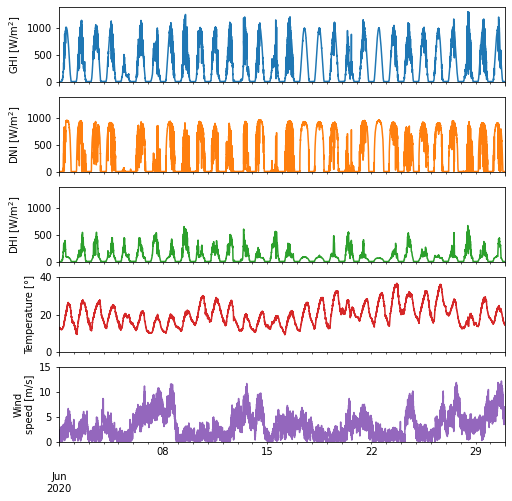

In [4]:
axes = df[['ghi_0','dni_0','dhi_3','temp_air_1','wind_speed_1']].plot(
    subplots=True, legend=False, rot=0, figsize=(8,8), sharex=True)

# Set y-labels and y-limits
axes[0].set_ylabel('GHI [W/m$^2$]'), axes[0].set_ylim(-10,1400)
axes[1].set_ylabel('DNI [W/m$^2$]'), axes[1].set_ylim(-10,1400)
axes[2].set_ylabel('DHI [W/m$^2$]'), axes[2].set_ylim(-10,1400)
axes[3].set_ylabel('Temperature [°]'), axes[3].set_ylim(0,40)
_ = axes[4].set_ylabel('Wind\nspeed [m/s]'), axes[4].set_ylim(0,15)

## To do
* Also plot the low-quality stations (ask Josh if they have a list of stations)
* Refer to a list of station acronyms, e.g, HE